<a href="https://colab.research.google.com/github/MRnickRuss/AI/blob/main/Pr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [2]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from imutils import paths
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

In [4]:
cifar100 = tf.keras.datasets.cifar100

(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### 1.2. Визуализируйте несколько изображений из датасета:


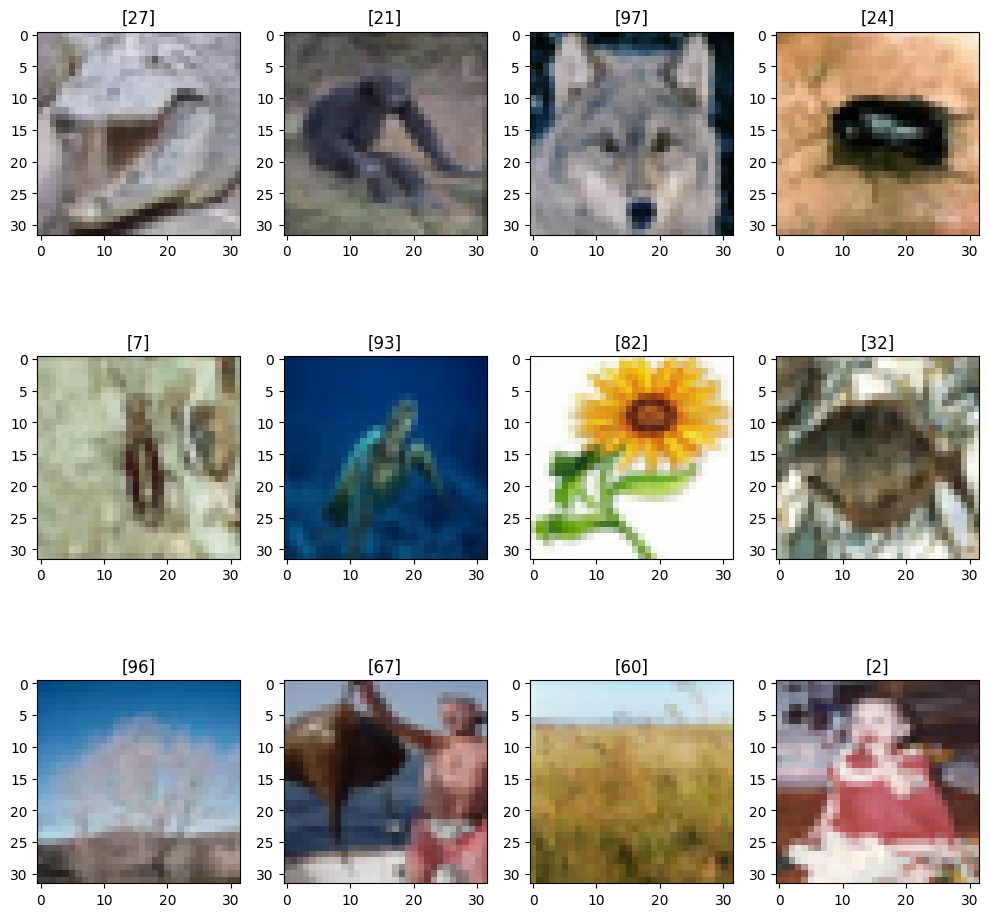

In [5]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

### 1.3. Произведите нормализацию данных:

In [6]:
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)
y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [8]:
# x_train.reshape(len(x_train), 3072)
# x_val.reshape(len(x_val), 3072)

x_train = np.array(x_train, dtype="float") / 255.0
x_val = np.array(x_val, dtype="float") / 255.0

print(x_train.shape)
print(x_val.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [9]:
model1 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100,  activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

Обучите созданную модель

In [10]:
model1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val))

model1.evaluate(x_val, y_val)

Epoch 1/5
1563/1563 [==============================] - 15s 7ms/step - loss: 3.6398 - accuracy: 0.1523 - val_loss: 3.0871 - val_accuracy: 0.2478
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8668 - accuracy: 0.2893 - val_loss: 2.7863 - val_accuracy: 0.3110
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5383 - accuracy: 0.3567 - val_loss: 2.6576 - val_accuracy: 0.3411
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3098 - accuracy: 0.4034 - val_loss: 2.5591 - val_accuracy: 0.3612
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.5256 - accuracy: 0.3722


[2.5256195068359375, 0.37220001220703125]

### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [11]:
model2 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 16)        64        
 chNormalization)                                                
                                                      

Обучите созданную модель

In [12]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val))

model2.evaluate(x_val, y_val)

Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 3.5186 - accuracy: 0.1787 - val_loss: 3.4153 - val_accuracy: 0.2075
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.7670 - accuracy: 0.3161 - val_loss: 2.8767 - val_accuracy: 0.2974
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.4879 - accuracy: 0.3683 - val_loss: 2.6814 - val_accuracy: 0.3309
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3383 - accuracy: 0.4029 - val_loss: 2.8119 - val_accuracy: 0.3147
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.5814 - accuracy: 0.3528


[2.581434726715088, 0.35280001163482666]

### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [13]:
model3 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100,  activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)         

Обучите созданную модель

In [14]:
model3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val,y_val))

model3.evaluate(x_val, y_val)

Epoch 1/15
1563/1563 [==============================] - 10s 5ms/step - loss: 3.9631 - accuracy: 0.0970 - val_loss: 3.5271 - val_accuracy: 0.1735
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3401 - accuracy: 0.1981 - val_loss: 3.1392 - val_accuracy: 0.2371
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 3.1100 - accuracy: 0.2405 - val_loss: 2.9938 - val_accuracy: 0.2725
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9738 - accuracy: 0.2676 - val_loss: 2.9387 - val_accuracy: 0.2782
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8824 - accuracy: 0.2836 - val_loss: 2.8454 - val_accuracy: 0.2999
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8143 - accuracy: 0.2952 - val_loss: 2.7516 - val_accuracy: 0.3187
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7495 - accuracy: 0.3083 - val_loss: 2.7313 - val_accuracy

[2.5075008869171143, 0.36250001192092896]

### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [15]:
model4 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 16)       

Обучите созданную модель

In [16]:
model4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val,y_val))

model4.evaluate(x_val, y_val)

Epoch 1/15
1563/1563 [==============================] - 17s 8ms/step - loss: 3.6816 - accuracy: 0.1501 - val_loss: 3.2191 - val_accuracy: 0.2282
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0826 - accuracy: 0.2500 - val_loss: 2.9734 - val_accuracy: 0.2750
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.8330 - accuracy: 0.2998 - val_loss: 2.7414 - val_accuracy: 0.3116
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.6762 - accuracy: 0.3295 - val_loss: 2.8254 - val_accuracy: 0.3082
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 2.5743 - accuracy: 0.3492 - val_loss: 2.5796 - val_accuracy: 0.3442
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.4898 - accuracy: 0.3666 - val_loss: 2.7251 - val_accuracy: 0.3240
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.4505 - accuracy: 0.3747 - val_loss: 2.5874 - val_acc

[2.6228697299957275, 0.3450999855995178]

### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

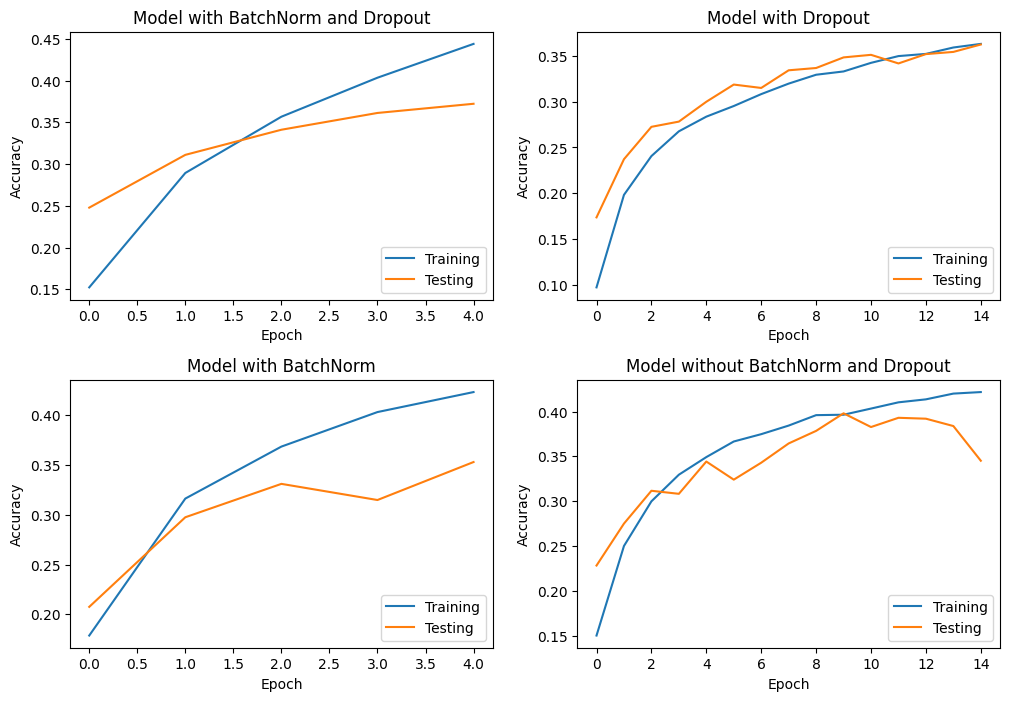

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Testing')
plt.title('Model with Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Testing')
plt.title('Model with BatchNorm')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(history4.history['accuracy'], label='Training')
plt.plot(history4.history['val_accuracy'], label='Testing')
plt.title('Model without BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.3)

plt.show()

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [18]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def visualize_act_map(model, img):
  """
  Функция для визуализации активаций слоев модели Keras в последовательном порядке

  Args:
      model: Обученная модель Keras
      img: Изображение, преобразованное в тензор

  Returns:
      None. Визуализирует активации интересующих слоев в последовательном порядке.
  """
  # Создаем модель для активаций
  layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D))]
  activation_model = Model(inputs=model.input, outputs=layer_outputs)

  # Получаем активации
  activations = activation_model.predict(img)

  # Визуализация активаций
  for layer_activation, layer in zip(activations, model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // 16 + int(n_features % 16 > 0)
      display_grid = np.zeros((size * n_cols, size * 16))

      for col in range(n_cols):
        for row in range(16):
            if col * 16 + row < n_features:  # Проверяем, что индекс не выходит за границы
              channel_image = layer_activation[0, :, :, col * 16 + row]
              channel_image -= channel_image.mean()

              # Добавлено исправление для RuntimeWarning: invalid value encountered in divide
              if channel_image.std() == 0:
                channel_image += 1*(10**8)

              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128

              # Добавлено исправление для RuntimeWarning: invalid value encountered in cast
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')

              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      scale = 1. / size
      fig, ax = plt.subplots(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      ax.set_title(layer.name)
      ax.grid(False)
      # Используем imshow для отображения изображений
      ax.imshow(display_grid, aspect='auto', cmap='viridis')

      # Создаем границы между плитками
      for i in range(1, n_cols):
        ax.axhline(y=i * size - 0.5, color='white', linewidth=2)
      for i in range(1, 16):
        ax.axvline(x=i * size - 0.5, color='white', linewidth=2)

      plt.show()

313/313 [==============================] - 2s 4ms/step


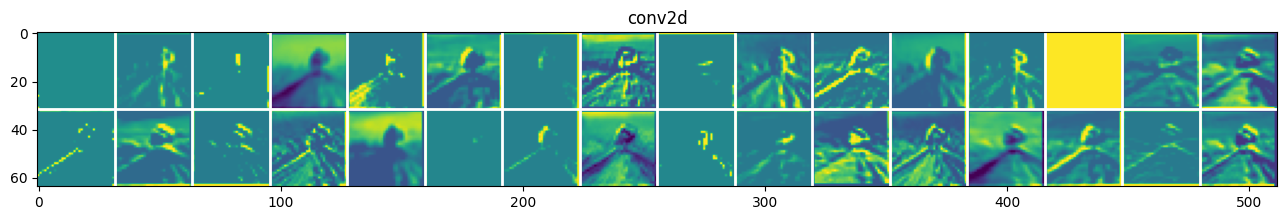

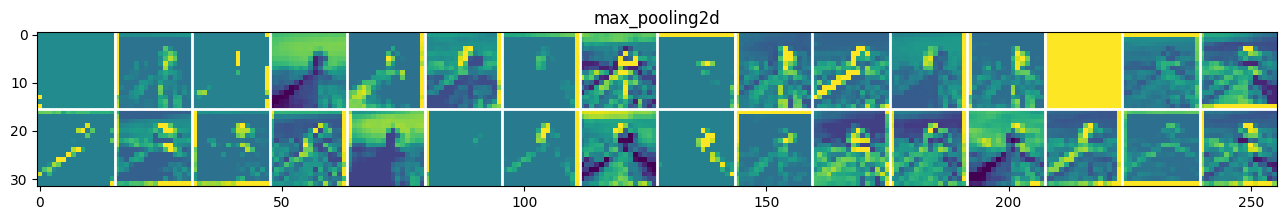

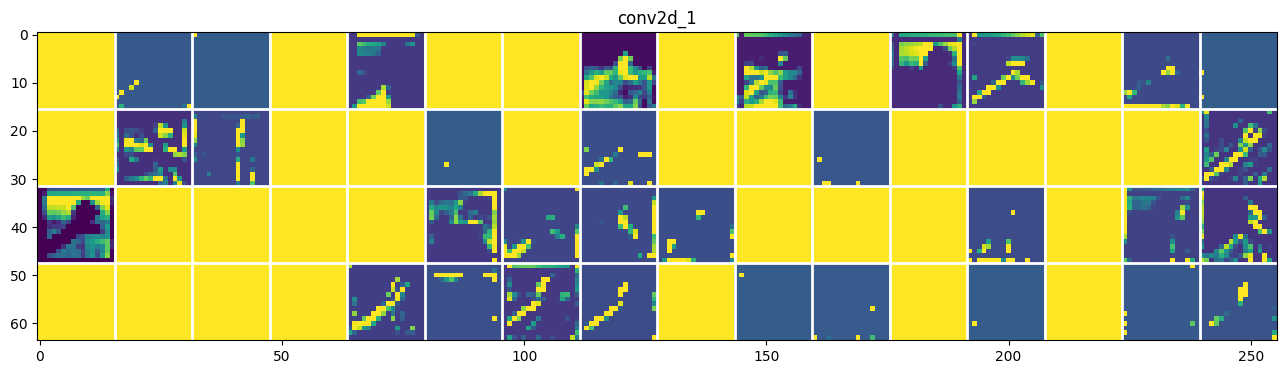

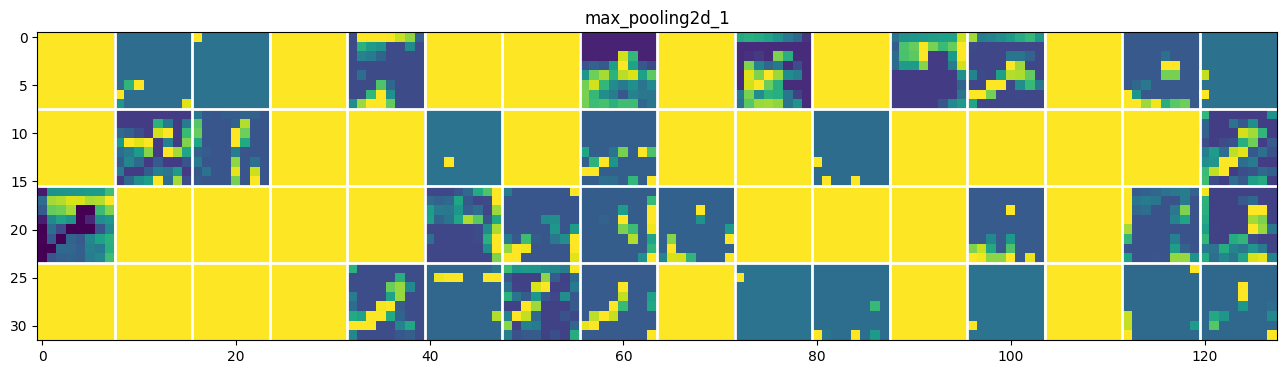

313/313 [==============================] - 1s 3ms/step


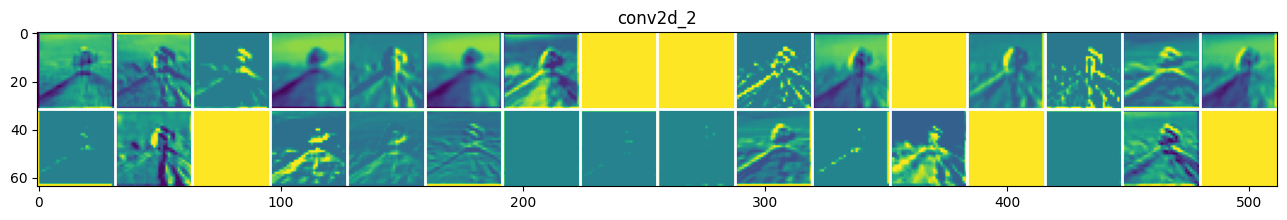

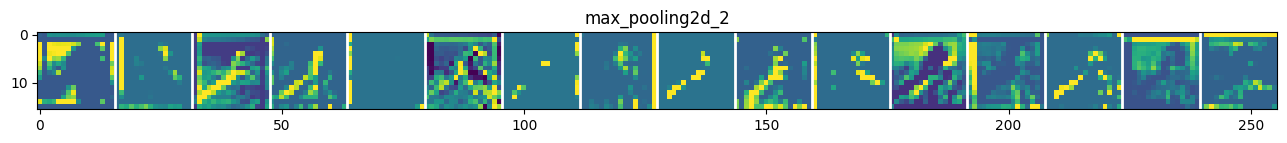

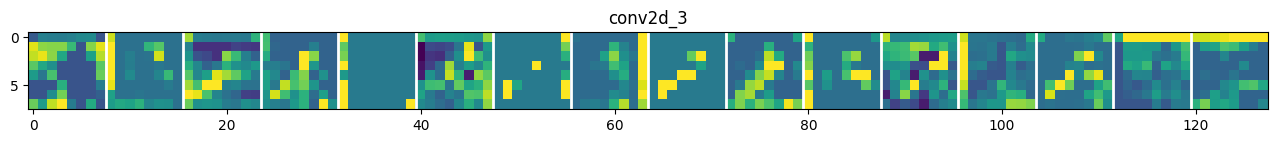

313/313 [==============================] - 1s 2ms/step


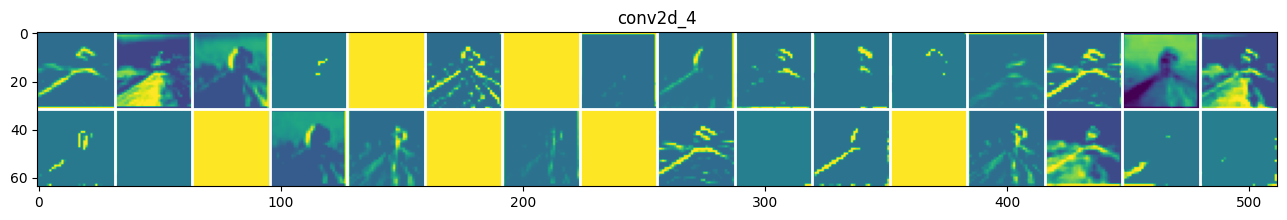

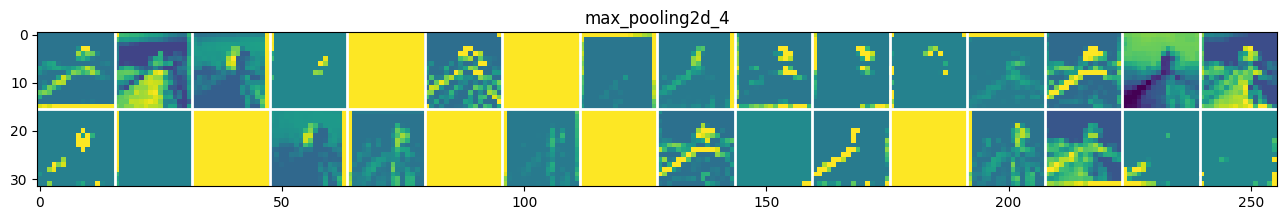

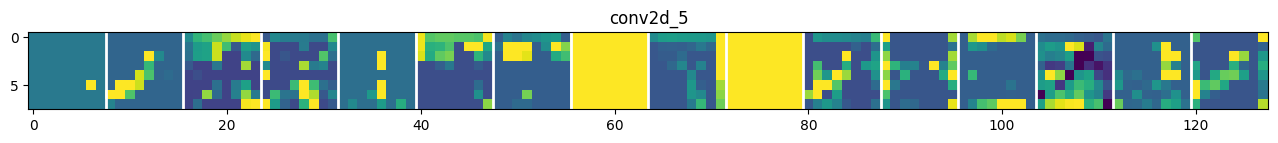

313/313 [==============================] - 1s 2ms/step


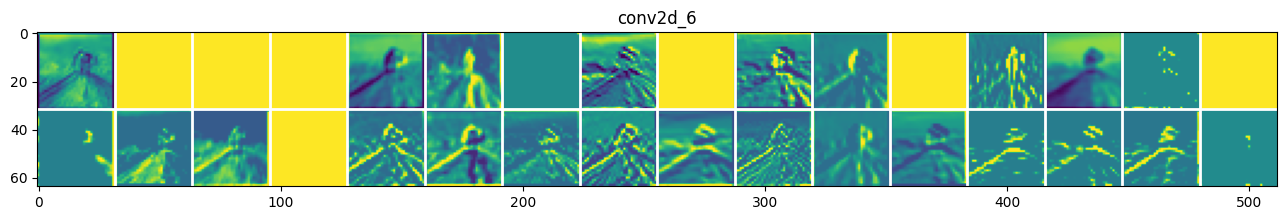

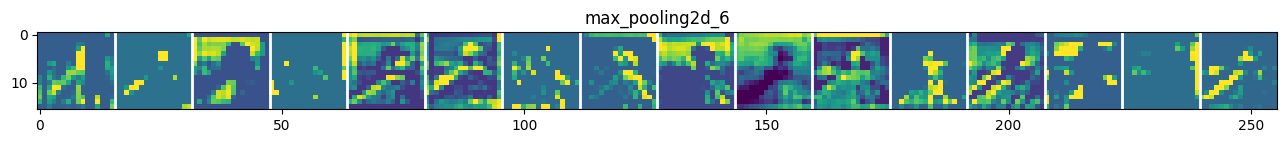

In [19]:
visualize_act_map(model1, x_val)
visualize_act_map(model2, x_val)
visualize_act_map(model3, x_val)
visualize_act_map(model4, x_val)

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [41]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [44]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/archive_2/Data")))
random.shuffle(imagePaths)

In [24]:
from google.colab.patches import cv2_imshow

compression_size = 32

data, labels = load_images(imagePaths, compression_size)

In [45]:
data = np.array(data, dtype='float')
labels = np.array(labels)

# data=data.reshape(len(data), compression_size, compression_size, 3)

print(data.shape)
print(labels.shape)

(3015, 32, 32, 3)
(3015,)


In [46]:
(X_train, X_val, Y_train, Y_val) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

print(X_train.shape)
print(X_train.shape)

(2261, 32, 32, 3)
(2261, 32, 32, 3)


In [47]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

print(Y_train.shape)
print(Y_val.shape)

print(Y_train[:3])
print(Y_val[:3])

(2261, 3)
(754, 3)
[[0 0 1]
 [0 0 1]
 [0 1 0]]
[[0 0 1]
 [0 1 0]
 [0 1 0]]


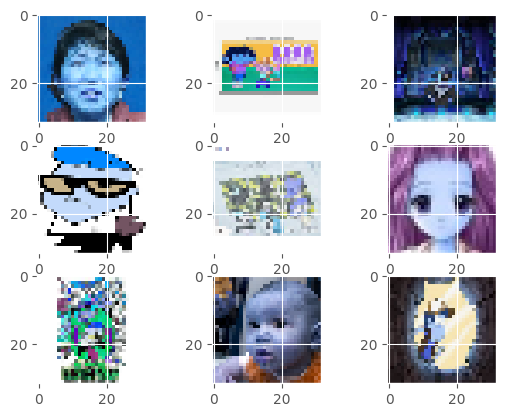

In [48]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [49]:
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(compression_size, compression_size, 3)))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2), strides=2))   #Removing MaxPooling layer: Add accuracy but reduces training speed
Dropout(0.25)

model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
Dropout(0.25)

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 256)              

In [50]:
model4 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_14 (Ba  (None, 16, 16, 16)       

In [51]:
INIT_LR = 0.00005
epochs = 6
opt = Adam(learning_rate=INIT_LR)

model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(X_val, Y_val))

model.evaluate(X_val, Y_val)

Epoch 1/6
71/71 [==============================] - 2s 10ms/step - loss: 1.0627 - accuracy: 0.4401 - val_loss: 0.9765 - val_accuracy: 0.5504
Epoch 2/6
71/71 [==============================] - 1s 7ms/step - loss: 0.8559 - accuracy: 0.6891 - val_loss: 0.6171 - val_accuracy: 0.8515
Epoch 3/6
71/71 [==============================] - 1s 7ms/step - loss: 0.5262 - accuracy: 0.8527 - val_loss: 0.3450 - val_accuracy: 0.9191
Epoch 4/6
71/71 [==============================] - 0s 7ms/step - loss: 0.3118 - accuracy: 0.9146 - val_loss: 0.2071 - val_accuracy: 0.9416
Epoch 5/6
71/71 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.9456 - val_loss: 0.1520 - val_accuracy: 0.9509
Epoch 6/6
24/24 [==============================] - 0s 6ms/step - loss: 0.1296 - accuracy: 0.9602


[0.12960028648376465, 0.960212230682373]

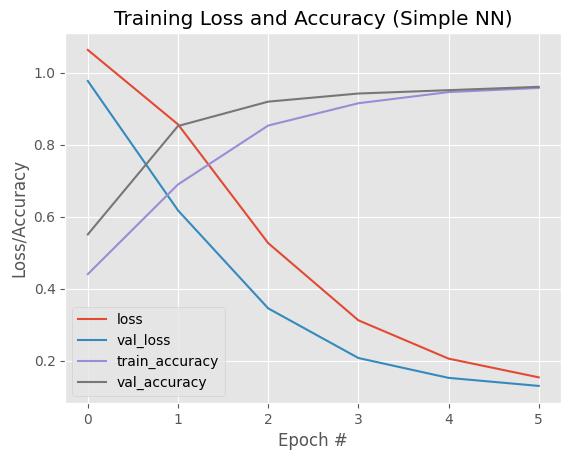

In [52]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [53]:
Y_train

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [39]:
from keras.models import load_model

model = load_model("/content/gdrive/MyDrive/model/model4.keras")

In [56]:
predictions = model.predict(X_val, batch_size=50)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

16/16 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       anime       0.97      0.98      0.97       259
     cartoon       0.97      0.95      0.96       237
       human       0.95      0.95      0.95       258

    accuracy                           0.96       754
   macro avg       0.96      0.96      0.96       754
weighted avg       0.96      0.96      0.96       754



In [57]:
predictions = model.predict(X_val, batch_size=50)

16/16 [==============================] - 0s 3ms/step


In [58]:
predictions[:3]

array([[1.0423207e-01, 1.2510520e-03, 8.9451694e-01],
       [1.2958569e-04, 9.9873430e-01, 1.1361452e-03],
       [5.2715097e-02, 5.2616614e-01, 4.2111877e-01]], dtype=float32)

16/16 [==============================] - 0s 3ms/step


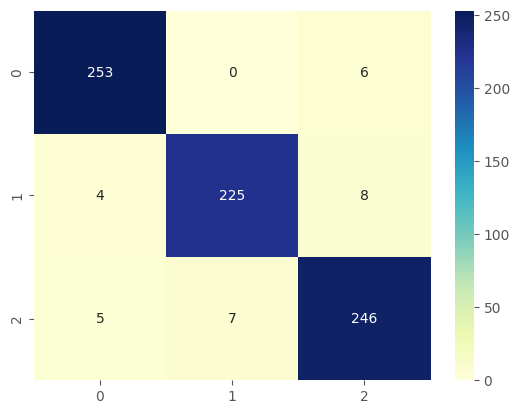

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
predY = model.predict(X_val, batch_size=50)

# Преобразуем вероятности в метки классов
predY = predY.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, predY)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [ ]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:
model_path = "/content/gdrive/MyDrive/model/model4.keras"
labels_path = "/content/gdrive/MyDrive/label/labels4"

save_model_and_labels(model, lb, model_path, labels_path)

In [60]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 MB/s 

In [73]:
from keras.models import load_model
import gradio
import pickle
import cv2

def preprocess_image_new(img, compression_size = 32):

  image = img.copy()
  image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  image = cv2.resize(image, (compression_size, compression_size))
  # image = image.astype("float") / 255.0
  image = np.array(image, dtype="float") / 255
  image = image.reshape(-1, 32, 32, 3)

  return image

In [74]:
img = cv2.imread('/content/gdrive/MyDrive/archive_2/Data/anime/892_2000.jpg')
print(type(img))
print(img.shape)
image = preprocess_image_new(img)
image.shape

<class 'numpy.ndarray'>
(59, 59, 3)


(1, 32, 32, 3)

In [75]:
def get_predict_new(img, preprocess_func = preprocess_image_new, model_path = "/content/gdrive/MyDrive/model/model4.keras", label_path = "/content/gdrive/MyDrive/label/labels4"):

  model = load_model("/content/gdrive/MyDrive/model/model4.keras")
  lb = pickle.loads(open("/content/gdrive/MyDrive/label/labels4", "rb").read())
  image = preprocess_image_new(img.copy())
  # image = image.reshape(-1, 64, 64, 3)
  preds = model.predict(image)
  confidences = {lb.classes_[i]: float(preds[0][i]) for i in range(len(preds[0]))}
  print(preds)

  return confidences

In [76]:
lb = pickle.loads(open("/content/gdrive/MyDrive/label/labels4", "rb").read())

interface_new = gradio.Interface(
    fn=get_predict_new,
    inputs=gradio.Image(label="Загрузите изображение"),
    outputs= gradio.Label(num_top_classes=len(lb.classes_)),
    examples=["/content/пdrive/MyDrive/991_2000.jpg",
              "/content/gdrive/MyDrive/74_2000.jpg",
              "/content/gdrive/MyDrive/6 (23).png",
              "/content/gdrive/MyDrive/4 (26).jpg",
              "/content/gdrive/MyDrive/01004.png",
              "/content/gdrive/MyDrive/00934.png"]
)

interface_new.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ad36319bc35e7e900a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 304ms/step
[[0.9817915  0.0068715  0.01133705]]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ad36319bc35e7e900a.gradio.live


In [77]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def visualize_act_map(model, img):
  """
  Функция для визуализации активаций слоев модели Keras в последовательном порядке

  Args:
      model: Обученная модель Keras
      img: Изображение, преобразованное в тензор

  Returns:
      None. Визуализирует активации интересующих слоев в последовательном порядке.
  """
  # Создаем модель для активаций
  layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D))]
  activation_model = Model(inputs=model.input, outputs=layer_outputs)

  # Получаем активации
  activations = activation_model.predict(img)

  # Визуализация активаций
  for layer_activation, layer in zip(activations, model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // 16 + int(n_features % 16 > 0)
      display_grid = np.zeros((size * n_cols, size * 16))

      for col in range(n_cols):
        for row in range(16):
            if col * 16 + row < n_features:  # Проверяем, что индекс не выходит за границы
              channel_image = layer_activation[0, :, :, col * 16 + row]
              channel_image -= channel_image.mean()

              # Добавлено исправление для RuntimeWarning: invalid value encountered in divide
              if channel_image.std() == 0:
                channel_image += 1*(10**8)

              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128

              # Добавлено исправление для RuntimeWarning: invalid value encountered in cast
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')

              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      scale = 1. / size
      fig, ax = plt.subplots(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      ax.set_title(layer.name)
      ax.grid(False)
      # Используем imshow для отображения изображений
      ax.imshow(display_grid, aspect='auto', cmap='viridis')

      # Создаем границы между плитками
      for i in range(1, n_cols):
        ax.axhline(y=i * size - 0.5, color='white', linewidth=2)
      for i in range(1, 16):
        ax.axvline(x=i * size - 0.5, color='white', linewidth=2)

      plt.show()

24/24 [==============================] - 0s 4ms/step


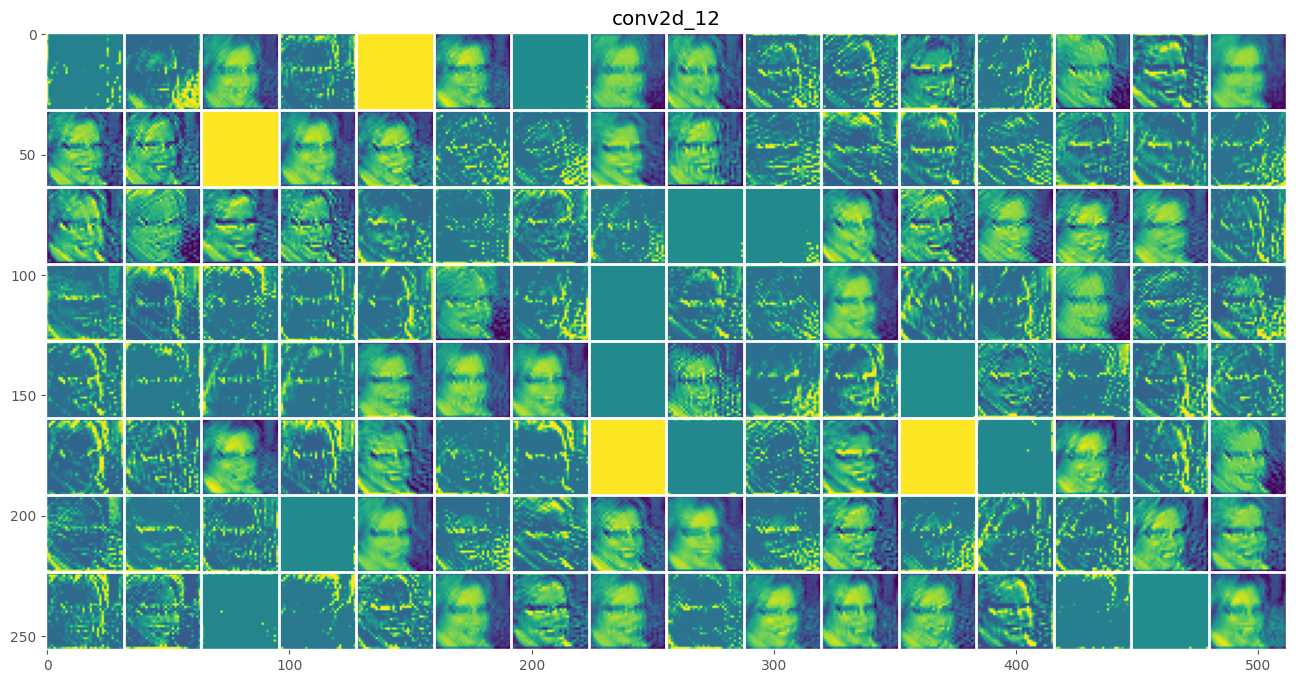

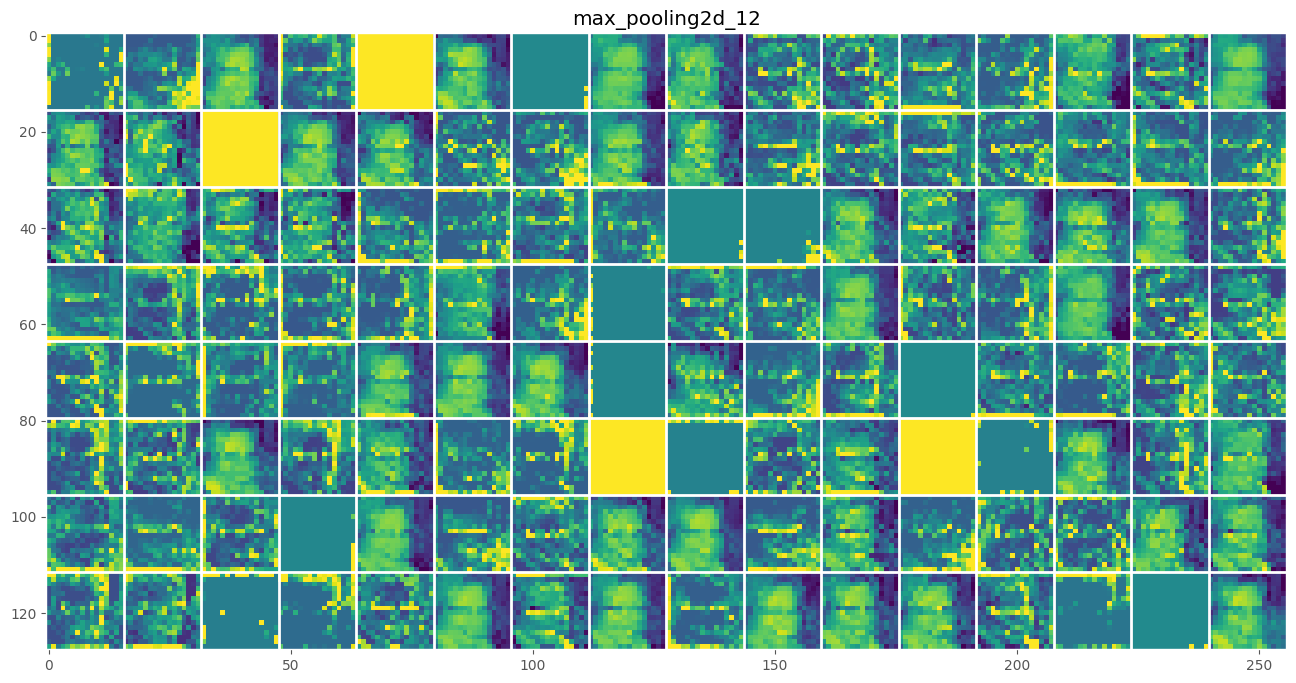

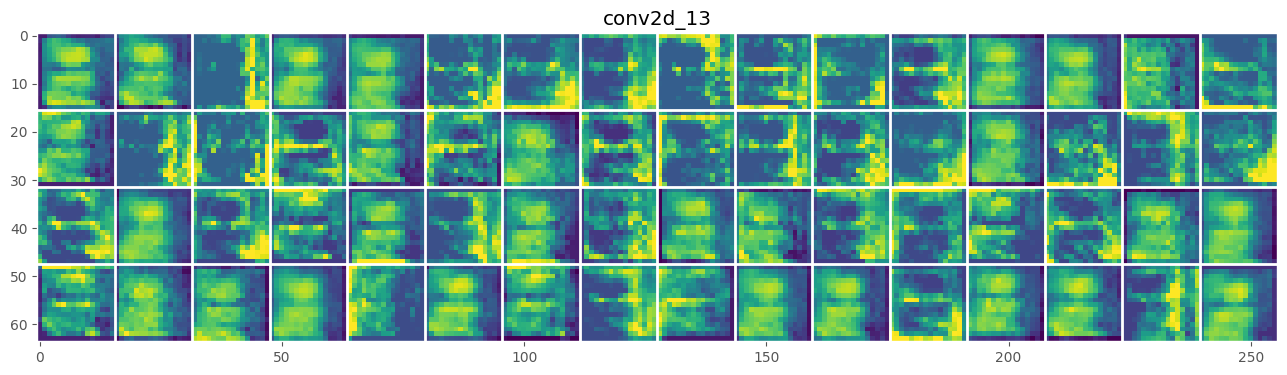

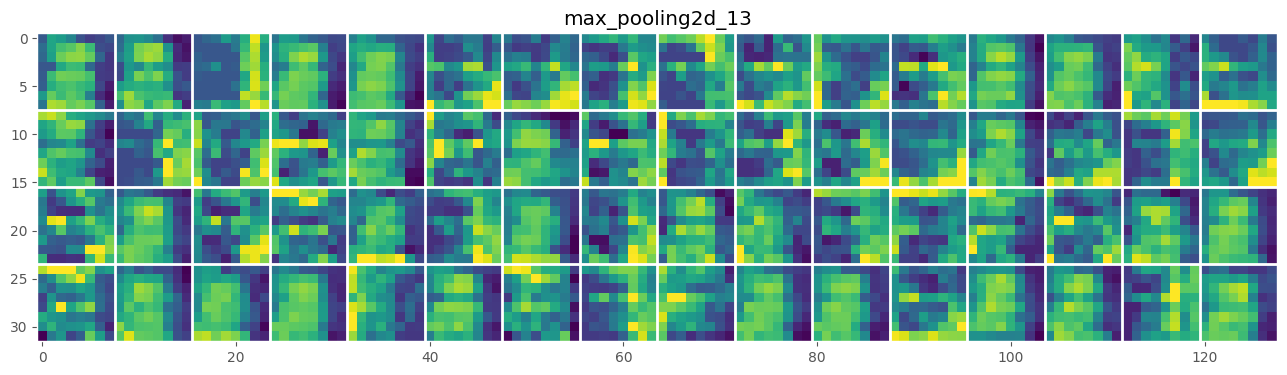

In [78]:
visualize_act_map(model, X_val)